In [1]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

import shutil

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


## Anomalous coeffs

### Make a fresh copy of a grid to operate on

In [4]:
shutil.copyfile(
    src = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-lores.nc",
    dst = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc",
)

mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc")

print(mesh.mesh.keys()[-5:])

# mesh.close()
# del mesh

['hypnotoad_inputs', 'hypnotoad_inputs_yaml', 'hypnotoad_input_geqdsk_file_contents', 'Python_version', 'module_versions']



 Last 5 fields: 
 ['hypnotoad_inputs_yaml', 'hypnotoad_input_geqdsk_file_contents', 'Python_version', 'module_versions', 'Chi_d+'] 

>>> Field Chi_d+ already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc, it will be overwritten
-> Wrote field Chi_d+ to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc

 Last 5 fields: 
 ['hypnotoad_inputs_yaml', 'hypnotoad_input_geqdsk_file_contents', 'Python_version', 'module_versions', 'Chi_d+'] 

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc closed

 Last 5 fields: 
 ['hypnotoad_inputs_yaml', 'hypnotoad_input_geqdsk_file_contents', 'Python_version', 'module_versions', 'Chi_d+'] 

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc closed


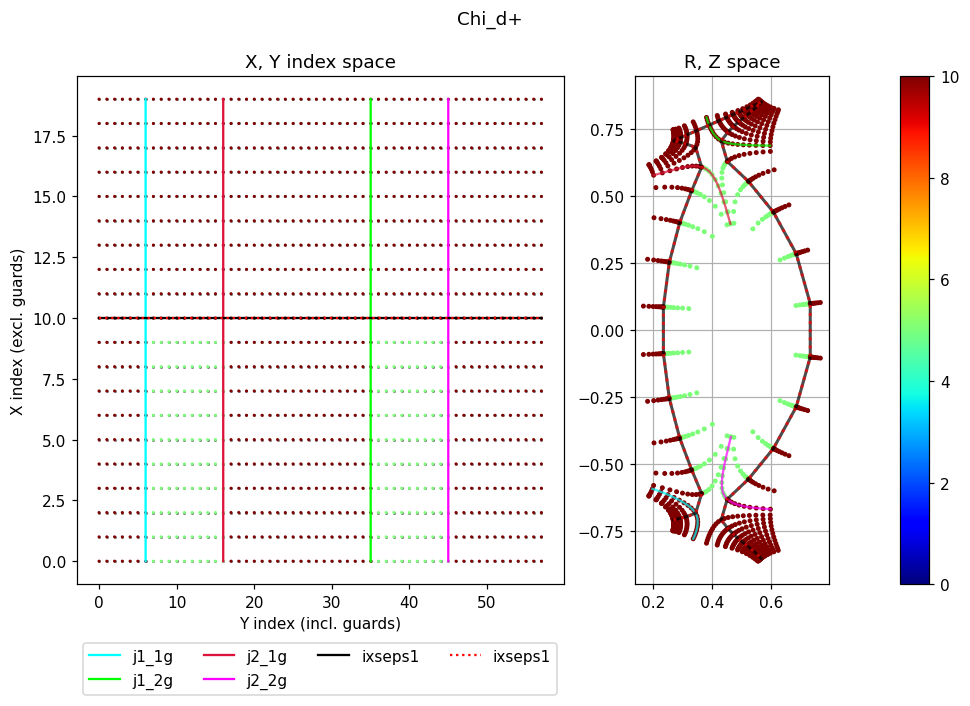

In [3]:
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc")

Chi = Field("Chi_d+", mesh)
Chi.data[mesh.slices("all")] = 10
Chi.data[mesh.slices("core")] = 5
# D.data[mesh.slices("outer_core")] = 0.5

print(f"\n Last 5 fields: \n {mesh.mesh.keys()[-5:]} \n")
mesh.write_field(Chi)
print(f"\n Last 5 fields: \n {mesh.mesh.keys()[-5:]} \n")

mesh.close()
del mesh

# Delete and re-read to check
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc")
print(f"\n Last 5 fields: \n {mesh.mesh.keys()[-5:]} \n")
mesh.plot_field("Chi_d+")
mesh.close()
del mesh




 Last 5 fields: 
 ['hypnotoad_inputs_yaml', 'hypnotoad_input_geqdsk_file_contents', 'Python_version', 'module_versions', 'Chi_d+'] 

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc closed


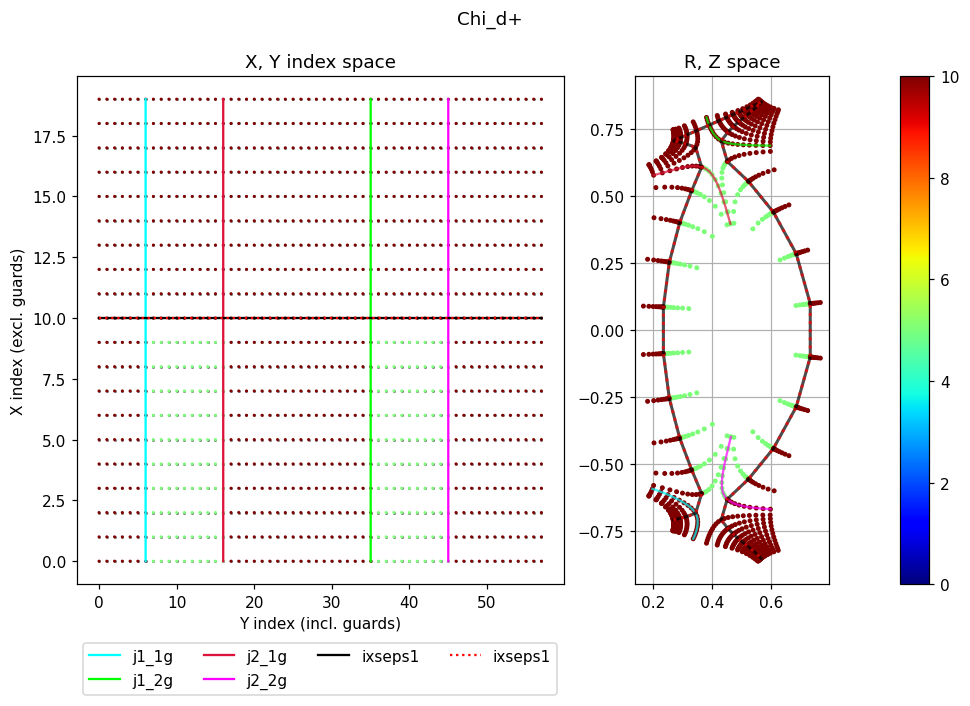

In [4]:
# Delete and re-read to check
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4-fieldtest.nc")
print(f"\n Last 5 fields: \n {mesh.mesh.keys()[-5:]} \n")
mesh.plot_field("Chi_d+")
mesh.close()
del mesh

## Sources

In [3]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a5f1-D0.5-Chi1.5.nc")
# Volume of entire core cell edge ring
v_innercore = meshwrapper.dv[meshwrapper.slices("inner_core_edge")].sum() + meshwrapper.dv[meshwrapper.slices("outer_core_edge")].sum()

hflux_i = 1e6    # In W
hflux_e = 0.76e6

mflux_i = 1.5e21    # ions/s. Core net ion flux 0.3 + puff of 1.2.

hsrc_i = hflux_i / v_innercore    # In Wm-3 or Pa/s
hsrc_e = hflux_e / v_innercore    # In Wm-3 or Pa/s
msrc_i = mflux_i / v_innercore

Pd_src = grid_fields.Field("Pd+_src", meshwrapper)
Pd_src.data[meshwrapper.slices("all")] = 0
Pd_src.data[meshwrapper.slices("inner_core_edge")] = hsrc_i
Pd_src.data[meshwrapper.slices("outer_core_edge")] = hsrc_i

Pe_src = grid_fields.Field("Pe_src", meshwrapper)
Pe_src.data[meshwrapper.slices("all")] = 0
Pe_src.data[meshwrapper.slices("inner_core_edge")] = hsrc_e
Pe_src.data[meshwrapper.slices("outer_core_edge")] = hsrc_e

Nd_src = grid_fields.Field("Nd+_src", meshwrapper)
Nd_src.data[meshwrapper.slices("all")] = 0
Nd_src.data[meshwrapper.slices("inner_core_edge")] = msrc_i
Nd_src.data[meshwrapper.slices("outer_core_edge")] = msrc_i

meshwrapper.write_field(Pd_src)
meshwrapper.write_field(Pe_src)
meshwrapper.write_field(Nd_src)

>>> Field Pd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc, it will be overwritten
-> Wrote field Pd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc
>>> Field Pe_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc, it will be overwritten
-> Wrote field Pe_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc
>>> Field Nd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc, it will be overwritten
-> Wrote field Nd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc


In [4]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4f2-allflux.nc")
np.sum(meshwrapper.mesh["Sd+_src"].squeeze() * meshwrapper.dv)

BoutArray(1.5e+21)

In [ ]:
case = h2D.Load.case_2D(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a7e-300ev", 
                        gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc", squeeze = False)

In [5]:
case.ds

NameError: name 'case' is not defined

In [2]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3f3-allflux_proper.nc")
m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21


In [6]:
meshwrapper.mesh["Sd+_src"].squeeze()[:,15]

BoutArray([0.00000000e+00, 0.00000000e+00, 1.38145638e+22, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [7]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3-hires.nc")

In [8]:
meshwrapper.summarise_grid()

 - ixseps1: 20    // id of first cell after separatrix 1
 - ixseps2: 20    // id of first cell after separatrix 2
 - jyseps1_1: 9    // near lower inner
 - jyseps1_2: 59    // near lower outer
 - jyseps2_1: 29    // near upper outer
 - jyseps2_2: 79    // near lower outer
 - ny_inner: 40    // no. poloidal cells in-between divertor regions
 - ny: 100    // total cells in Y (poloidal, does not include guard cells)
 - nx: 40    // total cells in X (radial, includes guard cells)


In [9]:
v_innercore = meshwrapper.dv[meshwrapper.slices("inner_core_edge")].sum() + meshwrapper.dv[meshwrapper.slices("outer_core_edge")].sum()

v_innercore

BoutArray(0.06578539)

In [10]:
print(f"hflux_i - total intended heat flux: {hflux_i:,.0f} W")
print(f"v_innercore - total intended heating region volume: {v_innercore:,.3f} m3")
print(f"hsrc_i - heat source per volume in each cell: {hsrc_i:,.0f} W/m3")

hflux_i - total intended heat flux: 1,000,000 W
v_innercore - total intended heating region volume: 0.066 m3
hsrc_i - heat source per volume in each cell: 9,209,709 W/m3


### SOLPS: 
- 2.5E-3 total inner ring volume (m3)
- 1.16 m3 total axisymmetric 3D domain cell volume


In [11]:
np.sum(meshwrapper.dv)

BoutArray(1.606558)

In [12]:
%matplotlib inline

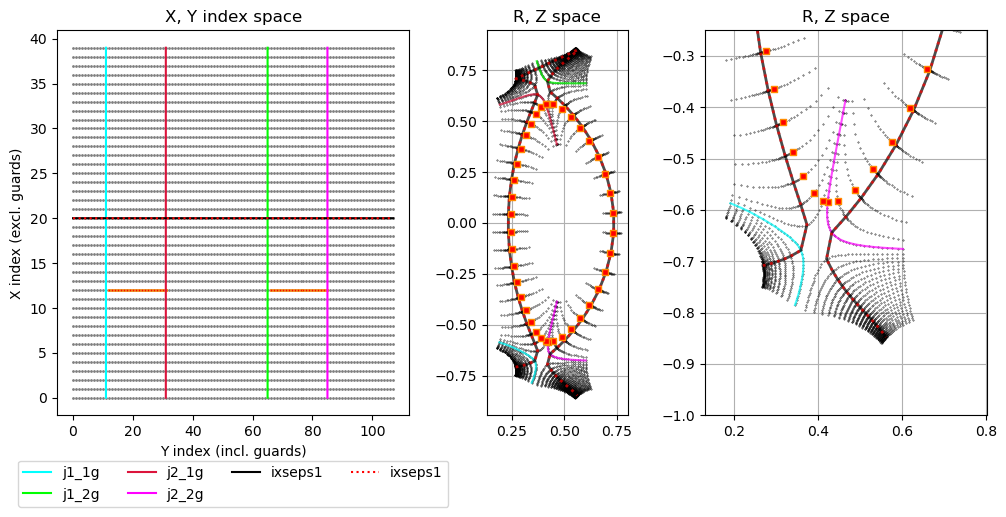

In [13]:
# meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1_fields1.nc")
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a3-hires.nc")
meshwrapper.plot_slice(meshwrapper.slices("custom_core_ring")(10))

In [14]:
self = meshwrapper
[self.yflat[self.ixseps1]]*np.ones_like(self.yflat)

array([20, 20, 20, ..., 20, 20, 20])

In [15]:
self.yflat

array([  0,   1,   2, ..., 105, 106, 107])

In [16]:
meshwrapper.slices("upper_pfr_edge")

(slice(2, 3, None), slice(BoutArray(32), BoutArray(66), None))

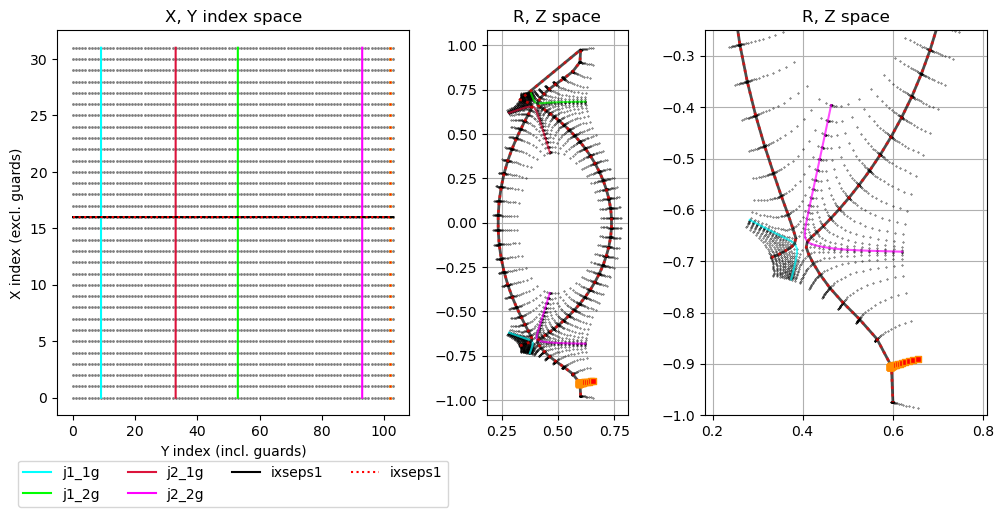

In [17]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1_fields1.nc")
meshwrapper.plot_slice(meshwrapper.slices("outer_lower_target_guard"))

NameError: name 'dv' is not defined

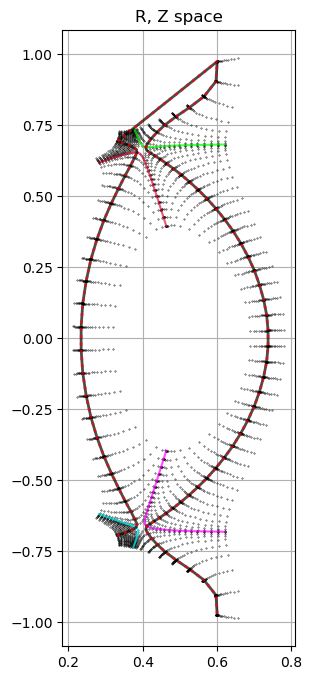

In [18]:
fig, ax = plt.subplots(figsize = (3,8))

meshwrapper.plot_rz_grid(ax)

ax.scatter(x = meshwrapper.rflat, y = meshwrapper.zflat, c = dv.flatten())

>>> Field Pd+_src already exists in C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1_fields1.nc, it will be overwritten
-> Wrote field Pd+_src to C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1_fields1.nc


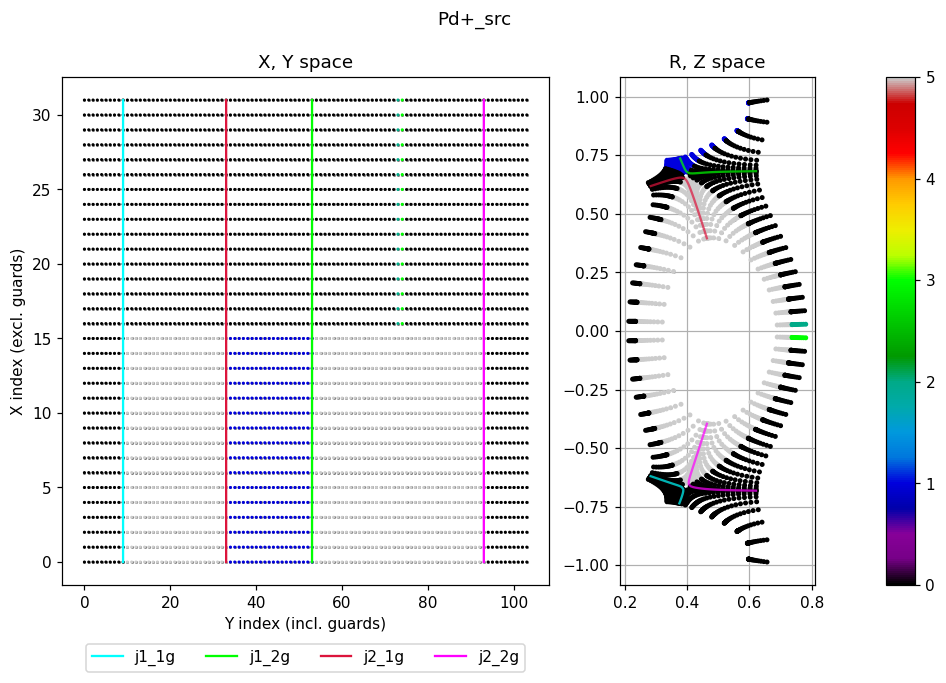

In [ ]:
meshwrapper = grid_fields.Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1_fields1.nc")

b = grid_fields.Field("Pd+_src", meshwrapper)

b.data[meshwrapper.slices("all")] = 0
b.data[meshwrapper.slices("upper_pfr")] = 1
b.data[meshwrapper.slices("outer_midplane_a")] = 2
b.data[meshwrapper.slices("outer_midplane_b")] = 3
b.data[meshwrapper.slices("inner_core_edge")] = 4
b.data[meshwrapper.slices("inner_core")] = 5

b.plot()

meshwrapper.write_field(b)

In [ ]:
b_expand = np.expand_dims(b.data, -1)
b_expand.attributes["bout_type"] = "Field3D"

mesh = meshwrapper.mesh

mesh.write("Pd+_src", b_expand, info = True)

Defining dimension z of size 1


In [ ]:
mesh["Pd+_src"].attributes

{'bout_type': 'Field3D'}

In [ ]:
b_expand.attributes

{'bout_type': 'Field3D'}

(32, 104, 1)

In [ ]:
dump = DataFile(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\a4-neumann\BOUT.dmp.0.nc")

In [ ]:
a7e = h2D.Load.case_2D(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a7e-300ev", 
                        gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc", squeeze = False)

C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc
C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a7e-300ev


In [ ]:
ds = a7e.ds
ds["Ne"].values.shape

(1026, 32, 104, 1)

In [ ]:
 ndata(1, 1 , 1 )= 4 ,\n',
 ' tdata(1,  1 , 1 , 1 )= -0.2 , tdata(2,  1 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  2 , 1 , 1 )= -0.0001, tdata(2,  2 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  3 , 1 , 1 )= 0.0 , tdata(2,  3 , 1 , 1 )= 1.000 ,\n',
 ' tdata(1,  4 , 1 , 1 )= 0.05 , tdata(2,  4 , 1 , 1 )= 1.000 ,\n',
 ' ndata(1, 3 , 1 )= 7 ,\n',
 ' tdata(1,  1 , 3 , 1 )= -0.2 , tdata(2,  1 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  2 , 3 , 1 )= -0.0001 , tdata(2,  2 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  3 , 3 , 1 )= 0.0 , tdata(2,  3 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  4 , 3 , 1 )= 0.0015 , tdata(2,  4 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  5 , 3 , 1 )= 0.002 , tdata(2,  5 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  6 , 3 , 1 )= 0.006 , tdata(2,  6 , 3 , 1 )= 3.0 ,\n',
 ' tdata(1,  7 , 3 , 1 )= 0.05 , tdata(2,  7 , 3 , 1 )= 3.00 ,\n',
 ' ndata(1, 4 , 0 )= 7 ,\n',
 ' tdata(1,  1 , 4 , 0 )= -0.2 , tdata(2,  1 , 4 , 0 )= 0.450 ,\n',
 ' tdata(1,  2 , 4 , 0 )= -0.0001 , tdata(2,  2 , 4 , 0 )= 0.450 ,\n',
 ' tdata(1,  3 , 4 , 0 )= 0.0 , tdata(2,  3 , 4 , 0 )= 3.000 ,\n',
 ' tdata(1,  4 , 4 , 0 )= 0.0015 , tdata(2,  4 , 4 , 0 )= 3.000 ,\n',
 ' tdata(1,  5 , 4 , 0 )= 0.002 , tdata(2,  5 , 4 , 0 )= 3.000 ,\n',
 ' tdata(1,  6 , 4 , 0 )= 0.006 , tdata(2,  6 , 4 , 0 )= 3.00 ,\n',
 ' tdata(1,  7 , 4 , 0 )= 0.05 , tdata(2,  7 , 4 , 0 )= 3.0 ,\n',

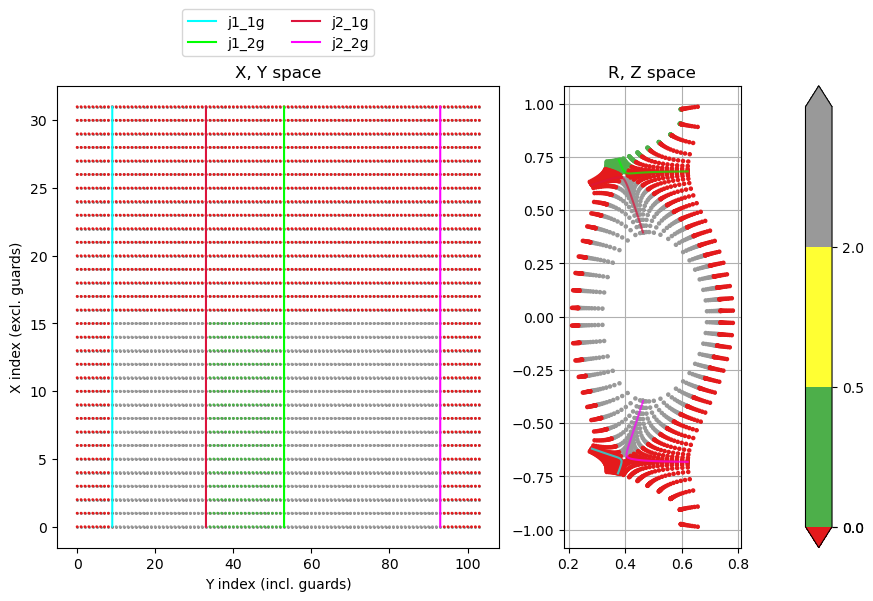

In [ ]:
self = mesh

field = np.ones_like(self.Rxy) 

field[:,:] = 0
field[mesh.slices("lower_pfr")] = 0
field[mesh.slices("upper_pfr")] = 0.5
field[mesh.slices("inner_core")] = 2

cmap = plt.get_cmap("Set1")

fieldnorm = field / np.max(field) * 1
colors = [cmap(x) for x in fieldnorm.flatten()]

fig, axes = plt.subplots(1,3, figsize = (10,6), gridspec_kw={'width_ratios': [5,2.0, 0.3]})
fig.subplots_adjust(wspace=0.3)

mesh.plot_xy_grid(axes[0])
axes[0].scatter(mesh.yflat, mesh.xflat, c = colors, s = 1)

mesh.plot_rz_grid(axes[1])
axes[1].scatter(mesh.rflat, mesh.zflat, c = colors, s = 5)

bounds = [0] + list(set(field.flatten()))
bounds.sort()
# norm = mpl.colors.Normalize(vmin=np.min(field), vmax=np.max(field))
norm = mpl.colors.BoundaryNorm(bounds + [3], cmap.N)

cbar = mpl.colorbar.ColorbarBase(ax=axes[2], cmap = cmap, norm = norm, boundaries = bounds, ticks = bounds, extend = "both")


In [ ]:
test = list(set(field.flatten()))
test.sort()
test

[0.0, 0.3, 2.0]

In [ ]:
test.

grid_fields.Mesh.Field

In [ ]:
a7 = h2D.Load.case_2D(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben", gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc")

C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc
C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben


# Coefficient functions
Here you go!

- First column = distance from separatrix at OMP [m]
- Second column = value of transport coefficient [m^2/s]

- First coefficient = particle diffusivity D
- Second coefficient = electron heat diffusivity chi_e
- Third coefficient = ion heat diffusivity chi_i (= chi_e)

Cheers,
Matteo

In [ ]:
file = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\Anomalous coeffs 2022-11-21\b2.transport.inputfile"

with open(file) as f:
    lines = f.readlines()

lines

[' &TRANSPORT\n',
 ' \n',
 ' NO_PFLUX=T,\n',
 ' ndata(1, 1 , 1 )= 4 ,\n',
 ' tdata(1,  1 , 1 , 1 )= -0.2 , tdata(2,  1 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  2 , 1 , 1 )= -0.0001, tdata(2,  2 , 1 , 1 )= 0.300 ,\n',
 ' tdata(1,  3 , 1 , 1 )= 0.0 , tdata(2,  3 , 1 , 1 )= 1.000 ,\n',
 ' tdata(1,  4 , 1 , 1 )= 0.05 , tdata(2,  4 , 1 , 1 )= 1.000 ,\n',
 ' ndata(1, 3 , 1 )= 7 ,\n',
 ' tdata(1,  1 , 3 , 1 )= -0.2 , tdata(2,  1 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  2 , 3 , 1 )= -0.0001 , tdata(2,  2 , 3 , 1 )= 0.450 ,\n',
 ' tdata(1,  3 , 3 , 1 )= 0.0 , tdata(2,  3 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  4 , 3 , 1 )= 0.0015 , tdata(2,  4 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  5 , 3 , 1 )= 0.002 , tdata(2,  5 , 3 , 1 )= 3.000 ,\n',
 ' tdata(1,  6 , 3 , 1 )= 0.006 , tdata(2,  6 , 3 , 1 )= 3.0 ,\n',
 ' tdata(1,  7 , 3 , 1 )= 0.05 , tdata(2,  7 , 3 , 1 )= 3.00 ,\n',
 ' ndata(1, 4 , 0 )= 7 ,\n',
 ' tdata(1,  1 , 4 , 0 )= -0.2 , tdata(2,  1 , 4 , 0 )= 0.450 ,\n',
 ' tdata(1,  2 , 4 , 0 )= -0.0001 , tdata(2,  2 

In [ ]:
D = {
    -0.0001 : 0.300,
    0.0 : 1.000
    }

Chi_e = {
    -0.0001 : 0.450,
    0.0 : 3.000
    }

Chi_i = {
    -0.0001 : 0.450,
    0.0 : 3.000
    }

## Making heaviside function

In [ ]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

x = np.array(range(32))

df = pd.DataFrame()

xsep = 16
df["x"] = x

df["D"] = H(x - (xsep)) * 1.00 + H((xsep+1) - x) * 3.00

df

,x,D
0,0,3.0
1,1,3.0
2,2,3.0
3,3,3.0
4,4,3.0
5,5,3.0
6,6,3.0
7,7,3.0
8,8,3.0
9,9,3.0


## Making X index array

In [ ]:
self = a7

nx = self.ds.metadata["nx"]
MXG = self.ds.metadata["MXG"]

i = np.array(range(nx-4))

x = (i + 0.5) / (nx - 2*MXG)

x

xi = x * (nx - 2*MXG) - 0.5
xi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27.])

# Making core function

In [ ]:
%matplotlib inline

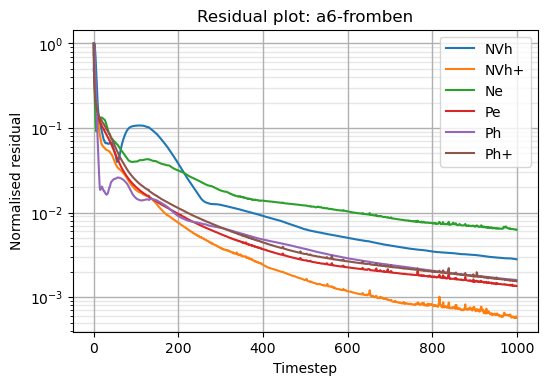

In [ ]:
a6.plot_residuals()

In [ ]:
self.derive_vars()

In [ ]:
meta = self.ds.metadata

print(f' - ixseps1: {meta["ixseps1"]}    // id of first cell after separatrix 1')
print(f' - ixseps2: {meta["ixseps2"]}    // id of first cell after separatrix 2')
print(f' - jyseps1_1: {meta["jyseps1_1"]}    // near lower inner')
print(f' - jyseps1_2: {meta["jyseps1_2"]}    // near lower outer')
print(f' - jyseps2_1: {meta["jyseps2_1"]}    // near upper outer')
print(f' - jyseps2_2: {meta["jyseps2_2"]}    // near lower outer')
print(f' - ny_inner: {meta["ny_inner"]}    // no. poloidal cells in-between divertor regions')
print(f' - ny: {meta["ny"]}    // total cells in Y (poloidal, does not include guard cells)')
print(f' - nx: {meta["nx"]}    // total cells in X (radial, includes guard cells)')

 - ixseps1: 16    // id of first cell after separatrix 1
 - ixseps2: 16    // id of first cell after separatrix 2
 - jyseps1_1: 7    // near lower inner
 - jyseps1_2: 47    // near lower outer
 - jyseps2_1: 31    // near upper outer
 - jyseps2_2: 87    // near lower outer
 - ny_inner: 40    // no. poloidal cells in-between divertor regions
 - ny: 96    // total cells in Y (poloidal, does not include guard cells)
 - nx: 32    // total cells in X (radial, includes guard cells)


In [ ]:
region = self.ds.isel(x=x_slice, theta = theta_slice)

region.theta

In [ ]:
def make_xtheta(region):
    """ 
    This pads x and theta so that they can be
    plotted on a X,Y grid
    """
    r_x = region.x
    r_theta = region.theta

    f = np.zeros((len(r_theta),len(r_x)))
    new_x = []
    new_theta = []

    for i in range(len(r_theta)):
        new_x.append(r_x)
    for i in range(len(r_x)):
        new_theta.append(r_theta.values)

    new_theta = np.concatenate(new_theta)
    new_x = np.concatenate(new_x)

    return new_x, new_theta

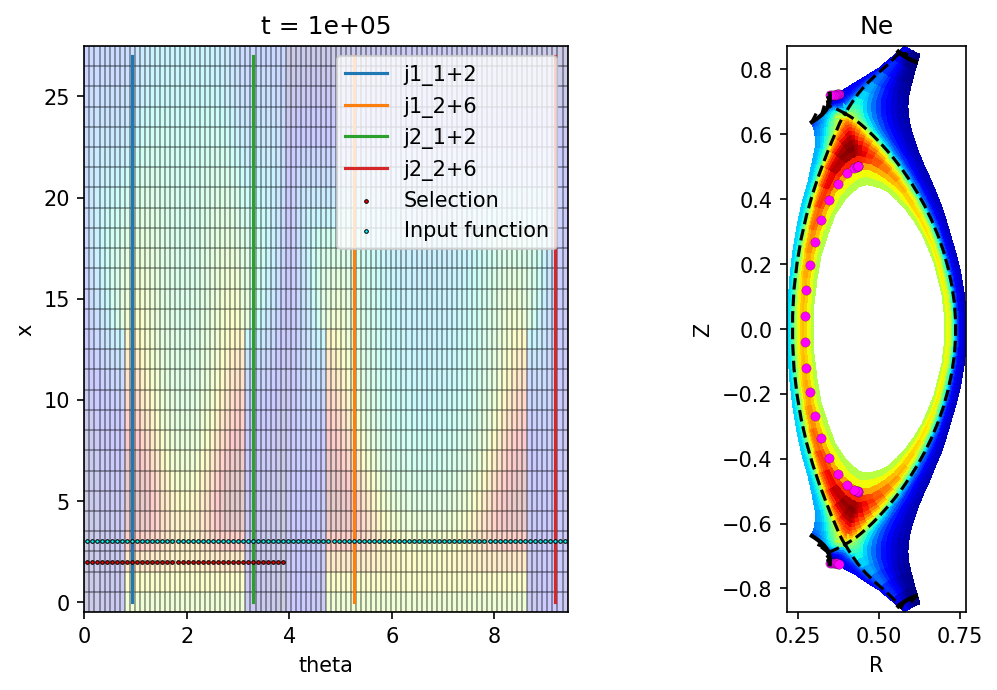

In [ ]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
MXG = meta["MYG"]

fig, axes = plt.subplots(1,2, figsize=(8,5), dpi = 150, gridspec_kw={'width_ratios': [2.5, 1]})

self.ds["Ne"].isel(t=-1).plot(ax = axes[0], alpha = 0.2, edgecolors = "black", linewidths = 0.05, cmap = "jet")
self.ds["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[1], linewidths = 0.05, cmap = "jet")

x_slice = slice(2,3)
# theta_slice = slice(jyseps1_2+6 + 1, jyseps2_2+6 + 1)
theta_slice = slice(None, meta["ny_inner"])
# x_slice = slice(None, None)
# theta_slice = slice(None, None)


region = self.ds.isel(x=x_slice, theta = theta_slice)

r = region.R
z = region.Z

new_x, new_theta = make_xtheta(region)

y = self.ds.theta.values

input_fun_y = H(y - jyseps1_2 + 3*MXG + 1)
input_y = np.ma.MaskedArray(self.ds.theta.values)
input_y.mask = input_fun_y.astype(bool)
input_y = input_y.compressed()

axes[1].scatter(x = r, y = z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

axes[0].plot([self.ds.theta[jyseps1_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_1+2")
axes[0].plot([self.ds.theta[jyseps1_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_2+6")
axes[0].plot([self.ds.theta[jyseps2_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_1+2")
axes[0].plot([self.ds.theta[jyseps2_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_2+6")
axes[0].scatter(x = new_theta, y = new_x, s = 3, c = "red", edgecolors = "black", linewidths = 0.5, label = "Selection", zorder = 20)

axes[0].scatter(x = input_y, y = [3] * len(input_y), s = 3, c = "cyan", edgecolors = "black", linewidths = 0.5, label = "Input function", zorder = 20)
axes[0].legend()

# Remove colorbars. hardcoded
fig.axes[-1].remove()
fig.axes[2].remove()

# axes[0].collections[-1].colorbar.remove()


In [ ]:
y_idx = np.array(range(len(self.ds.theta.values)))
input_fun_y = H(y_idx - jyseps1_2 + 3*MXG + 1)   # in index space
input_y_idx = np.ma.MaskedArray(y_idx)
input_y_idx.mask = ~input_fun_y.astype(bool)
# input_y = input_y.compressed()

In [ ]:
input_y = self.ds.theta.values
input_y = input_y[(input_y_idx.compressed())]
input_y

array([ 4.07425297,  4.17242774,  4.27060251,  4.36877728,  4.46695205,
        4.56512682,  4.6633016 ,  4.76147637,  4.85965114,  4.95782591,
        5.05600068,  5.15417545,  5.25235022,  5.35052499,  5.44869976,
        5.54687453,  5.6450493 ,  5.74322407,  5.84139884,  5.93957361,
        6.03774838,  6.13592315,  6.23409792,  6.33227269,  6.43044746,
        6.52862223,  6.626797  ,  6.72497177,  6.82314654,  6.92132131,
        7.01949609,  7.11767086,  7.21584563,  7.3140204 ,  7.41219517,
        7.51036994,  7.60854471,  7.70671948,  7.80489425,  7.90306902,
        8.00124379,  8.09941856,  8.19759333,  8.2957681 ,  8.39394287,
        8.49211764,  8.59029241,  8.68846718,  8.78664195,  8.88481672,
        8.98299149,  9.08116626,  9.17934103,  9.27751581,  9.37569058,
        9.47386535,  9.57204012,  9.67021489,  9.76838966,  9.86656443,
        9.9647392 , 10.06291397, 10.16108874])

# Now with masking

In [ ]:
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
MXG = meta["MYG"]

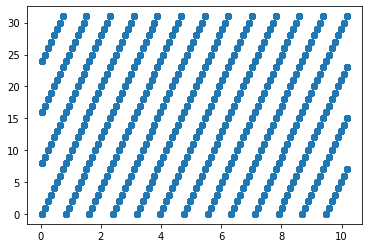

In [ ]:
full_x = np.concatenate([self.ds.x.values] * len(self.ds.theta.values))
full_theta = np.concatenate([self.ds.theta.values] * len(self.ds.x.values))

plt.scatter(full_theta, full_x)
# plt.scatter(new_theta, new)x)

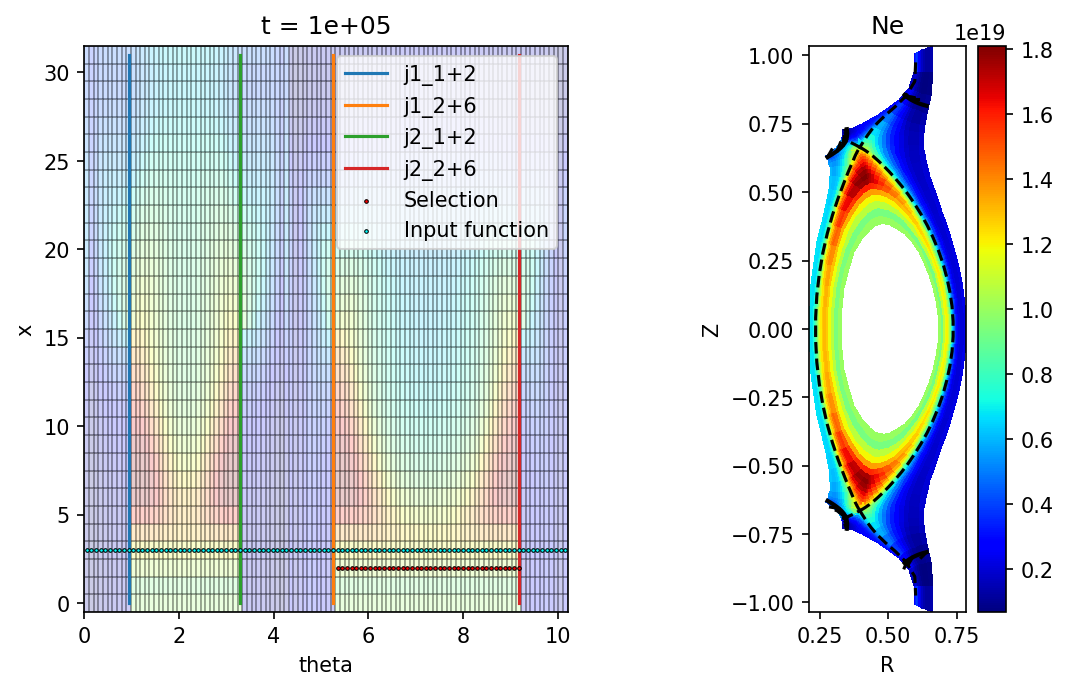

In [ ]:
x_slice = slice(2,3)
theta_slice = slice(jyseps1_2+6 + 1, jyseps2_2+6 + 1)


region = self.ds.isel(x=x_slice, theta = theta_slice)

r = region.R
z = region.Z

new_x, new_theta = make_xtheta(region)

y = self.ds.theta.values

input_fun_y = H(y - jyseps1_2 + 3*MXG + 1)
input_y = np.ma.MaskedArray(self.ds.theta.values)
input_y.mask = input_fun_y.astype(bool)
input_y = input_y.compressed()


fig, axes = plt.subplots(1,2, figsize=(8,5), dpi = 150, gridspec_kw={'width_ratios': [2.5, 1]})

# self.ds["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[1], linewidths = 0.05, cmap = "jet")
# axes[1].scatter(x = r, y = z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

self.ds["Ne"].isel(t=-1).plot(ax = axes[0], alpha = 0.2, edgecolors = "black", linewidths = 0.05, cmap = "jet")
axes[0].plot([self.ds.theta[jyseps1_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_1+2")
axes[0].plot([self.ds.theta[jyseps1_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j1_2+6")
axes[0].plot([self.ds.theta[jyseps2_1+2]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_1+2")
axes[0].plot([self.ds.theta[jyseps2_2+6]]*np.ones_like(self.ds.x), self.ds.x, label = "j2_2+6")
axes[0].scatter(x = new_theta, y = new_x, s = 3, c = "red", edgecolors = "black", linewidths = 0.5, label = "Selection", zorder = 20)

axes[0].scatter(x = input_y, y = [3] * len(input_y), s = 3, c = "cyan", edgecolors = "black", linewidths = 0.5, label = "Input function", zorder = 20)
axes[0].legend()

# Remove colorbars. hardcoded
# fig.axes[-1].remove()
# fig.axes[2].remove()

# axes[0].collections[-1].colorbar.remove()


# Now by reconstructing input file x and y

In [ ]:
new = h2D.Load.case_2D(
    r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben", 
    gridfilepath = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc",
    keep_boundaries = False)

    

C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\first-test\st40-a1.nc
C:\Users\mikek\OneDrive\Project\collab\tech\cases\st40\a6-fromben


In [ ]:
self = new
def H(x):
    x[x>0] = 1
    x[x<0] = 0
    return x

meta = self.ds.metadata
jyseps1_1 = meta["jyseps1_1"]
jyseps1_2 = meta["jyseps1_2"]
jyseps2_1 = meta["jyseps2_1"]
jyseps2_2 = meta["jyseps2_2"]
ny_inner = meta["ny_inner"]
MXG = meta["MYG"]

In [ ]:
ny_inner

40

In [ ]:
y_idx = np.array(range(len(self.ds.theta.values)))
y = np.zeros_like(y_idx)
y[:ny_inner] = 2*np.pi*(y_idx[:ny_inner] - 0.5 - jyseps1_1)
y[ny_inner:] = 2*np.pi*(y_idx[ny_inner:] - 0.5 - jyseps1_1 - (jyseps1_2 - jyseps2_1))

y

array([-47, -40, -34, -28, -21, -15,  -9,  -3,   3,   9,  15,  21,  28,
        34,  40,  47,  53,  59,  65,  72,  78,  84,  91,  97, 103, 109,
       116, 122, 128, 135, 141, 147, 153, 160, 166, 172, 179, 185, 191,
       197, 103, 109, 116, 122, 128, 135, 141, 147, 153, 160, 166, 172,
       179, 185, 191, 197, 204, 210, 216, 223, 229, 235, 241, 248, 254,
       260, 267, 273, 279, 285, 292, 298, 304, 311, 317, 323, 329, 336,
       342, 348, 354, 361, 367, 373, 380, 386, 392, 398, 405, 411, 417,
       424, 430, 436, 442, 449])

In [ ]:
ny_inner

NameError: name 'ny_inner' is not defined

In [ ]:
fun = H(y_idx - jyseps1_2 + 3*MXG + 1)
fun.astype(np.bool)

C:\Users\mikek\AppData\Local\Temp\ipykernel_22092\1898074325.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fun.astype(np.bool)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
y = np.ma.MaskedArray(self.ds.theta)
y.mask = fun.astype(bool)

y

masked_array(data=[0.04908738521234052, 0.14726215563702155,
                   0.2454369260617026, 0.3436116964863836,
                   0.44178646691106466, 0.5399612373357456,
                   0.6381360077604268, 0.7363107781851077,
                   0.8344855486097889, 0.9326603190344698,
                   1.0308350894591507, 1.1290098598838318,
                   1.227184630308513, 1.3253594007331941,
                   1.4235341711578753, 1.5217089415825564,
                   1.6198837120072376, 1.7180584824319187,
                   1.8162332528565999, 1.914408023281281,
                   2.0125827937059624, 2.1107575641306435,
                   2.2089323345553247, 2.307107104980006,
                   2.405281875404687, 2.503456645829368,
                   2.6016314162540493, 2.6998061866787304,
                   2.7979809571034115, 2.8961557275280927,
                   2.994330497952774, 3.092505268377455,
                   3.190680038802136, 3.2888548092268173,
  

In [ ]:
print(self.ds["Ne"].isel(t=-1, theta = 5).values)

self.ds["Ne"].isel(t=-1, theta = 5, x = -1).values = 10

print("\n",self.ds["Ne"].isel(t=-1, theta = 5).values)

[1.67383362e+18 1.63038092e+18 1.63038092e+18 1.67383362e+18
 1.68068512e+18 1.75516187e+18 1.83021709e+18 1.97093231e+18
 2.09348407e+18 2.28424170e+18 2.51087195e+18 2.80094891e+18
 3.17033290e+18 3.64403738e+18 4.24116772e+18 4.93464533e+18
 5.59267139e+18 6.21075545e+18 6.63208387e+18 6.84458810e+18
 6.88094120e+18 6.76666617e+18 6.54556957e+18 6.22345987e+18
 6.03012778e+18 5.65272299e+18 5.27166860e+18 4.91830701e+18
 4.60793452e+18 4.45286232e+18 4.45286232e+18 4.60793452e+18]

 [1.67383362e+18 1.63038092e+18 1.63038092e+18 1.67383362e+18
 1.68068512e+18 1.75516187e+18 1.83021709e+18 1.97093231e+18
 2.09348407e+18 2.28424170e+18 2.51087195e+18 2.80094891e+18
 3.17033290e+18 3.64403738e+18 4.24116772e+18 4.93464533e+18
 5.59267139e+18 6.21075545e+18 6.63208387e+18 6.84458810e+18
 6.88094120e+18 6.76666617e+18 6.54556957e+18 6.22345987e+18
 6.03012778e+18 5.65272299e+18 5.27166860e+18 4.91830701e+18
 4.60793452e+18 4.45286232e+18 4.45286232e+18 4.60793452e+18]


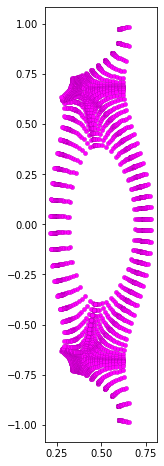

In [ ]:
fig, ax = plt.subplots(figsize = (2,8))
R = self.ds.R
Z = self.ds.Z
ax.scatter(x = self.ds.R, y = self.ds.Z, s = 20, c = "magenta", edgecolors = "black", linewidths = 0.1)

In [ ]:
self.ds.isel(R = 0, Z = 0)

ValueError: Dimensions {'Z', 'R'} do not exist. Expected one or more of Frozen({'x': 32, 'theta': 104, 't': 1001})

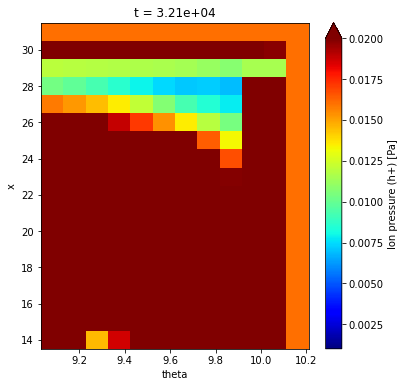

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

r["Ph+"].isel(t=-1).plot(ax = ax, vmin = 0.001, vmax = 0.02, cmap = "jet")

In [ ]:
self.ds.regions.keys()

dict_keys(['lower_inner_PFR', 'lower_inner_SOL', 'inner_core', 'inner_SOL', 'upper_inner_PFR', 'upper_inner_SOL', 'upper_outer_PFR', 'upper_outer_SOL', 'outer_core', 'outer_SOL', 'lower_outer_PFR', 'lower_outer_SOL'])

In [ ]:
self = compass

fig, axes = plt.subplots(1,2, figsize = (10,7), gridspec_kw={'width_ratios': [1,3]})

ny = self.ds.metadata["ny"]
jyseps1_1 = self.ds.metadata["jyseps1_1"]
jyseps2_2 = self.ds.metadata["jyseps2_2"]

ax = axes[0]
x = 12
# theta = np.r_[0:jyseps1_1+2,jyseps2_2+6+1:ny+8]
theta = np.r_[0:jyseps1_1,jyseps2_2+1:ny]

sr = self.ds["R"].isel(x=x, theta = theta)
sz = self.ds["Z"].isel(x=x, theta = theta)

ax.scatter(x = self.ds["R"], y = self.ds["Z"], s = 2)
ax.scatter(x = sr, y = sz, s = 10, c = "r")
ax.grid()

ax = axes[1]
self.ds["Ph+"].isel(x=[10,9], t=-1).plot(ax = ax, marker = "o", c = "r")
# self.ds["Z"].isel(x=x).plot(ax = ax, marker = "o", c = "r")
ax.grid()